# Download learning data
Jan2023 \
author: Inês Laranjeira

In [1]:
"""
IMPORTS
"""
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import os

from brainbox.task.trials import find_trial_ids
from brainbox.behavior.training import get_sessions, get_training_status

In [3]:
from one.api import ONE
new_one = ONE().setup()

ONE Parameter files location: /home/ines/.one


In [2]:
from one.api import ONE
#one = ONE(base_url='https://openalyx.internationalbrainlab.org')  # public database
one = ONE(base_url='https://alyx.internationalbrainlab.org')  # public database

In [3]:
# --Get my functions
functions_path = "../Functions/"
os.chdir(functions_path)
from one_functions_generic import get_trials, performance_metrics, training_time, quartile

In [9]:
""" Download trials """
#trials = get_trials(training_protocol='training', mouse_project='ibl_neuropixel_brainwide_01')

data_path = "../DATA/"
os.chdir(data_path)
pickle.dump(trials, open("trials_private_one", "wb"))
#trials = pickle.load(open("trials_private_one", "rb"))

In [10]:
""" Calculate training time """
#training_time = training_time(trials)
data_path = '/home/ines/repositories/learning_variability/DATA/'
os.chdir(data_path)
pickle.dump(training_time, open("training_time_private_one", "wb"))
#training_time_df = pickle.load(open("training_time_private_one", "rb"))

Downloading: /home/ines/Downloads/ONE/alyx.internationalbrainlab.org/tmp0omemv30/cache.zip Bytes: 89839855


100%|██████████| 85.67796230316162/85.67796230316162 [00:33<00:00,  2.58it/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/churchlandlab/Subjects/CSHL055/2020-01-16/003/alf/_ibl_trials.included.npy: 100%|██████████| 1.09k/1.09k [00:00<00:00, 3.42kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/churchlandlab/Subjects/CSHL055/2020-01-16/003/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 7.84k/7.84k [00:00<00:00, 21.2kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/churchlandlab/Subjects/CSHL055/2020-01-16/003/alf/_ibl_trials.stimOnTrigger_times.npy: 100%|██████████| 7.84k/7.84k [00:00<00:00, 23.7kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/churchlandlab/Subjects/CSHL055/2020-01-16/003/alf/_ibl_trials.table.pqt: 100%|██████████| 73.4k/73.4k [00:00<00:00, 122kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/churchlandlab/Subjects/CSHL055/2020-01-15/001/alf/_ibl_trials.included.npy: 100%|██████████| 982/982 [00:00<0

Problems with session:95c0f4fd-a213-49a0-95fe-b7b4ddc5b77b


/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/zadorlab/Subjects/CSH_ZAD_015/2020-06-09/001/alf/_ibl_trials.table.pqt: 100%|██████████| 63.1k/63.1k [00:00<00:00, 108kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/zadorlab/Subjects/CSH_ZAD_015/2020-06-09/001/alf/_ibl_trials.stimOnTrigger_times.npy: 100%|██████████| 6.78k/6.78k [00:00<00:00, 21.4kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/zadorlab/Subjects/CSH_ZAD_015/2020-06-09/001/alf/_ibl_trials.included.npy: 100%|██████████| 960/960 [00:00<00:00, 3.07kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/zadorlab/Subjects/CSH_ZAD_015/2020-06-09/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 6.78k/6.78k [00:00<00:00, 21.3kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/zadorlab/Subjects/CSH_ZAD_015/2020-06-08/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 7.88k/7.88k [00:00<00:00, 24.8kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/z

Problems with session:ede3e4d2-775e-4673-84d0-00782462b2f3
Problems with session:b94323a9-0182-4fa2-96f9-71c211c12b46
Problems with session:436c9449-e12a-4e95-8c48-6b3f9948d67f
Problems with session:8889874e-7312-4cf5-99a7-0189d72bf2ad
Problems with session:eddeedea-3185-426b-82c6-7110f032efe7
Problems with session:3eaacbd2-4698-4cc0-b4a8-4d8b860951d7


No training sessions detected for KS002


Problems with session:f7a26236-e24d-438d-a09a-3e57bf227b43


No training sessions detected for KS002


Problems with session:b5957744-d61c-4b96-89bd-6197e05b6f19


No training sessions detected for KS002


Problems with session:05423a11-b101-47f2-9b40-9f775652af60


/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS002/2019-06-28/001/alf/_ibl_trials.table.pqt: 100%|██████████| 46.3k/46.3k [00:00<00:00, 102kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS002/2019-06-28/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 4.50k/4.50k [00:00<00:00, 14.3kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS002/2019-06-27/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 5.68k/5.68k [00:00<00:00, 15.0kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS002/2019-06-27/001/alf/_ibl_trials.table.pqt: 100%|██████████| 56.0k/56.0k [00:00<00:00, 115kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS002/2019-08-12/002/alf/_ibl_trials.table.pqt: 100%|██████████| 41.5k/41.5k [00:00<00:00, 89.8kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS002/2019-08-12/002/

Problems with session:b59308b9-4c8a-43d9-aadf-ef42f0651770


No training sessions detected for KS003


Problems with session:2ed81b1f-ccac-4a6a-989b-769de78f3b39


No training sessions detected for KS003


Problems with session:c8ef527b-6f7f-4f08-8b99-5aeb9d2b3740
Problems with session:bcc83fde-ff65-4581-8f53-33ba6efdf307
Problems with session:91e166a7-c63d-4630-96e8-7a76cb1d2ea6
Problems with session:96831336-a010-467c-8d00-5ee8fe433327
Problems with session:0c0e9060-9fc2-4017-bedf-9004f231c5d3


/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS003/2019-06-28/001/alf/_ibl_trials.table.pqt: 100%|██████████| 80.1k/80.1k [00:00<00:00, 132kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS003/2019-06-28/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 8.53k/8.53k [00:00<00:00, 26.4kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS003/2019-06-27/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 10.3k/10.3k [00:00<00:00, 29.0kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS003/2019-06-27/001/alf/_ibl_trials.table.pqt: 100%|██████████| 94.4k/94.4k [00:00<00:00, 137kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS003/2019-08-12/002/alf/_ibl_trials.included.npy: 100%|██████████| 562/562 [00:00<00:00, 1.71kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS003/2019-08-12/002/a

Problems with session:364adaba-f3a0-4e4e-bc14-24854b2f3502


No training sessions detected for KS004


Problems with session:774d935f-0422-4ddc-ae2a-fb0b9fad30f9


/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS004/2019-06-28/001/alf/_ibl_trials.table.pqt: 100%|██████████| 49.6k/49.6k [00:00<00:00, 106kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS004/2019-06-28/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 4.92k/4.92k [00:00<00:00, 14.9kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS004/2019-06-27/002/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 2.50k/2.50k [00:00<00:00, 7.81kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS004/2019-06-27/002/alf/_ibl_trials.table.pqt: 100%|██████████| 29.6k/29.6k [00:00<00:00, 66.3kB/s]
No training sessions detected for KS005


Problems with session:7b92f0a1-5432-432d-a81b-ddbb976f87dc


No training sessions detected for KS005


Problems with session:9ed83838-29fd-4fa6-8fe7-3ccb45762831
Problems with session:0997c66f-6d39-454d-9a0f-be5fdf5714ad
Problems with session:f33f41cc-347a-458d-98c8-7e1c2c9c7600
Problems with session:13c99443-01ee-462e-b668-717daa526fc0
Problems with session:abf5109c-d780-44c8-9561-83e857c7bc01
Problems with session:7dc3c44b-225f-4083-be3d-07b8562885f4


/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS005/2019-06-28/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 7.06k/7.06k [00:00<00:00, 22.3kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS005/2019-06-28/001/alf/_ibl_trials.table.pqt: 100%|██████████| 67.4k/67.4k [00:00<00:00, 111kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS005/2019-06-27/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 5.97k/5.97k [00:00<00:00, 18.7kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS005/2019-06-27/001/alf/_ibl_trials.table.pqt: 100%|██████████| 58.4k/58.4k [00:00<00:00, 98.9kB/s]
No training sessions detected for KS006


Problems with session:17bb000c-66d9-4692-9ec0-4b97730714f0


No training sessions detected for KS006


Problems with session:e4e9396b-a165-4e7f-9aed-e3b02799584c


No training sessions detected for KS007


Problems with session:c1142ae6-42f5-4e4d-9ca7-52915ba70176


No training sessions detected for KS007


Problems with session:2fcf5a81-7668-4649-a7d9-02c2f0817bd6


/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS017/2019-09-16/001/alf/_ibl_trials.included.npy: 100%|██████████| 838/838 [00:00<00:00, 2.59kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS017/2019-09-16/001/alf/_ibl_trials.table.pqt: 100%|██████████| 54.4k/54.4k [00:00<00:00, 65.1kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS017/2019-09-16/001/alf/_ibl_trials.stimOnTrigger_times.npy: 100%|██████████| 5.81k/5.81k [00:00<00:00, 18.5kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS017/2019-09-16/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 5.81k/5.81k [00:00<00:00, 19.1kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS018/2019-11-12/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 2.71k/2.71k [00:00<00:00, 8.14kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS018/

Problems with session:8a6cea69-6306-45b1-b87c-bd7735c7fc65


/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS076/2021-10-05/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 2.83k/2.83k [00:00<00:00, 8.26kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS076/2021-10-05/001/alf/_ibl_trials.intervals.npy: 100%|██████████| 5.54k/5.54k [00:00<00:00, 16.0kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS076/2021-10-05/001/alf/_ibl_trials.rewardVolume.npy: 100%|██████████| 2.83k/2.83k [00:00<00:00, 9.05kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS076/2021-10-05/001/alf/_ibl_trials.feedbackType.npy: 100%|██████████| 466/466 [00:00<00:00, 1.47kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS076/2021-10-05/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 2.83k/2.83k [00:00<00:00, 8.78kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS076/2021

Problems with session:778b6ad6-122f-4468-9fe1-4ae9858dfa5f


/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS077/2021-10-05/001/alf/_ibl_trials.feedback_times.npy: 100%|██████████| 2.58k/2.58k [00:00<00:00, 7.98kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS077/2021-10-05/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 2.58k/2.58k [00:00<00:00, 7.29kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS077/2021-10-05/001/alf/_ibl_trials.stimOnTrigger_times.npy: 100%|██████████| 2.58k/2.58k [00:00<00:00, 8.25kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS077/2021-10-05/001/alf/_ibl_trials.intervals.npy: 100%|██████████| 5.02k/5.02k [00:00<00:00, 15.6kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS077/2021-10-05/001/alf/_ibl_trials.contrastLeft.npy: 100%|██████████| 2.58k/2.58k [00:00<00:00, 7.74kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS0

Problems with session:12afd2e9-37e4-40d0-8ad1-798fc422028e


/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS078/2021-10-05/001/alf/_ibl_trials.stimOn_times.npy: 100%|██████████| 2.67k/2.67k [00:00<00:00, 8.07kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS078/2021-10-05/001/alf/_ibl_trials.intervals.npy: 100%|██████████| 5.22k/5.22k [00:00<00:00, 14.5kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS078/2021-10-05/001/alf/_ibl_trials.contrastLeft.npy: 100%|██████████| 2.67k/2.67k [00:00<00:00, 7.82kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS078/2021-10-05/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 2.67k/2.67k [00:00<00:00, 8.16kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS078/2021-10-05/001/alf/_ibl_trials.contrastRight.npy: 100%|██████████| 2.67k/2.67k [00:00<00:00, 8.26kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS078/

Problems with session:7bca4cbc-ff3b-4cfc-a4b9-10032045dc30
Problems with session:593189fa-7922-40c9-af04-ac400ef58849
Problems with session:8f560448-9e6b-4116-aa21-bf686528dc41


/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS084/2021-12-15/001/alf/_ibl_trials.table.pqt: 100%|██████████| 53.9k/53.9k [00:00<00:00, 116kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS084/2021-12-15/001/alf/_ibl_trials.stimOnTrigger_times.npy: 100%|██████████| 5.42k/5.42k [00:00<00:00, 7.10kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS084/2021-12-15/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 5.42k/5.42k [00:00<00:00, 17.6kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS084/2021-12-15/001/alf/_ibl_trials.included.npy: 100%|██████████| 789/789 [00:00<00:00, 2.38kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS084/2021-12-14/001/alf/_ibl_trials.stimOnTrigger_times.npy: 100%|██████████| 4.48k/4.48k [00:00<00:00, 13.7kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS084/

Downloading: /home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS091/2022-04-25/001/alf/_ibl_trials.stimOnTrigger_times.9748e15d-a8c4-4a1a-a453-baaedcb75782.npy Bytes: 6824
Downloading: /home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS091/2022-04-25/001/alf/_ibl_trials.repNum.a98079cb-9a5e-4342-988f-eed605a2aaf2.npy Bytes: 6824
Downloading: /home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS091/2022-04-25/001/alf/_ibl_trials.goCueTrigger_times.e7235dbe-e053-41d4-b81a-13f9b89b66f6.npy Bytes: 6824


  0%|          | 0/0.00650787353515625 [00:00<?, ?it/s]
100%|██████████| 0.00650787353515625/0.00650787353515625 [00:00<00:00,  1.93s/it]
100%|██████████| 0.00650787353515625/0.00650787353515625 [00:00<00:00,  1.68s/it]
100%|██████████| 0.00650787353515625/0.00650787353515625 [00:00<00:00,  1.09it/s]


Downloading: /home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS093/2022-05-11/001/alf/_ibl_trials.stimOnTrigger_times.9a1858b7-eacb-4e18-b7b8-aee812281e64.npy Bytes: 3920


100%|██████████| 0.0037384033203125/0.0037384033203125 [00:00<00:00,  1.57it/s]


Downloading: /home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS093/2022-05-11/001/alf/_ibl_trials.table.db331d4d-547a-4d70-995e-c8c0f32aff47.pqt Bytes: 41184


  0%|          | 0/0.039276123046875 [00:00<?, ?it/s]

Downloading: /home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS093/2022-05-11/001/alf/_ibl_trials.goCueTrigger_times.faaac4e8-db33-4d04-a06a-37a7fa827747.npy Bytes: 3920


100%|██████████| 0.0037384033203125/0.0037384033203125 [00:00<00:00,  4.52it/s]
100%|██████████| 0.039276123046875/0.039276123046875 [00:00<00:00,  8.42s/it]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS093/2022-05-23/001/alf/_ibl_trials.stimOnTrigger_times.npy: 100%|██████████| 4.52k/4.52k [00:00<00:00, 9.52kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS093/2022-05-23/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 4.52k/4.52k [00:00<00:00, 14.2kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS093/2022-05-23/001/alf/_ibl_trials.table.pqt: 100%|██████████| 46.0k/46.0k [00:00<00:00, 96.6kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS093/2022-05-23/001/alf/_ibl_trials.included.npy: 100%|██████████| 677/677 [00:00<00:00, 2.23kB/s]


Downloading: /home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS095/2022-05-09/001/alf/_ibl_trials.repNum.e63bb856-64ca-46a1-aa04-56093114606a.npy Bytes: 6696


100%|██████████| 0.00638580322265625/0.00638580322265625 [00:00<00:00,  2.88it/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/angelakilab/Subjects/LTC01/2019-08-28/001/alf/_ibl_trials.table.pqt: 100%|██████████| 46.3k/46.3k [00:00<00:00, 98.2kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/angelakilab/Subjects/LTC01/2019-08-28/001/alf/_ibl_trials.included.npy: 100%|██████████| 712/712 [00:00<00:00, 1.95kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/angelakilab/Subjects/LTC01/2019-08-28/001/alf/_ibl_trials.stimOnTrigger_times.npy: 100%|██████████| 4.80k/4.80k [00:00<00:00, 12.4kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/angelakilab/Subjects/LTC01/2019-08-28/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 4.80k/4.80k [00:00<00:00, 13.9kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/angelakilab/Subjects/LTC02/2019-08-07/001/alf/_ibl_trials.stimOnTrigger_times.npy: 100%|██████████| 6.34k/6.34k [00:00<00:00

Problems with session:3e31890e-577c-4ef1-988e-6f361a71d922


/home/ines/miniconda3/envs/iblenv/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/home/ines/miniconda3/envs/iblenv/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/home/ines/miniconda3/envs/iblenv/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/home/ines/miniconda3/envs/iblenv/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/home/ines/miniconda3/envs/iblenv/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(

Problems with session:75ea0169-c5a4-4ff3-8ee2-def47b8634e7


/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0023/2022-04-30/001/alf/_ibl_trials.table.pqt: 100%|██████████| 38.9k/38.9k [00:00<00:00, 85.0kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0023/2022-04-30/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 3.66k/3.66k [00:00<00:00, 8.71kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0023/2022-04-30/001/alf/_ibl_trials.stimOnTrigger_times.npy: 100%|██████████| 3.66k/3.66k [00:00<00:00, 11.6kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0023/2022-04-30/001/alf/_ibl_trials.repNum.npy: 100%|██████████| 3.66k/3.66k [00:00<00:00, 11.1kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0023/2022-05-02/001/alf/_ibl_trials.table.pqt: 100%|██████████| 41.3k/41.3k [00:00<00:00, 88.7kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzla

Problems with session:2a71dc4d-d838-4abc-9c32-abad616c7cb4
Problems with session:8618c04a-8472-4cf5-a7e1-b0748bf0d482
Problems with session:be04c987-5cdc-4ee8-9d5c-d15a8f0db957
Problems with session:647406bd-c684-489c-821b-f8158ad735f1
Problems with session:3a823b38-3883-4780-be9d-3dfba4011aba
Problems with session:adc16ab8-28b0-40ac-a774-f0f864d99669
Problems with session:a4432cff-0bf4-44e3-a59d-e3c623fd8bf1
Problems with session:368283cd-993b-4db9-9077-ba8c29dde966
Problems with session:103c8297-66fb-4dd0-aa2d-5d54d6dd542d
Problems with session:b8a65b37-20e3-4055-b1f9-e4e401171ff4
Problems with session:cf9387ac-aecb-4af6-9906-52b34847c74e


/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/hoferlab/Subjects/SWC_002/2019-07-02/001/alf/_ibl_trials.included.npy: 100%|██████████| 783/783 [00:00<00:00, 2.17kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/hoferlab/Subjects/SWC_002/2019-07-02/001/alf/_ibl_trials.table.pqt: 100%|██████████| 53.7k/53.7k [00:00<00:00, 110kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/hoferlab/Subjects/SWC_002/2019-07-02/001/alf/_ibl_trials.repNum.npy: 100%|██████████| 5.37k/5.37k [00:00<00:00, 16.3kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/hoferlab/Subjects/SWC_002/2019-07-02/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 5.37k/5.37k [00:00<00:00, 15.5kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/mrsicflogellab/Subjects/SWC_008/2019-10-11/001/alf/_ibl_trials.included.npy: 100%|██████████| 851/851 [00:00<00:00, 2.72kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/mrsicflogellab/Subjects/SWC_008/2019-10-11

Problems with session:c3f94153-6acb-4a61-8523-3a60dbb470c0


/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/hoferlab/Subjects/SWC_013/2019-10-04/002/alf/_ibl_trials.included.npy: 100%|██████████| 647/647 [00:00<00:00, 1.84kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/hoferlab/Subjects/SWC_013/2019-10-04/002/alf/_ibl_trials.table.pqt: 100%|██████████| 44.4k/44.4k [00:00<00:00, 93.6kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/hoferlab/Subjects/SWC_013/2019-10-04/002/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 4.28k/4.28k [00:00<00:00, 9.79kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/hoferlab/Subjects/SWC_013/2019-10-04/002/alf/_ibl_trials.stimOnTrigger_times.npy: 100%|██████████| 4.28k/4.28k [00:00<00:00, 13.3kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/hoferlab/Subjects/SWC_013/2019-10-03/001/alf/_ibl_trials.stimOnTrigger_times.npy: 100%|██████████| 6.63k/6.63k [00:00<00:00, 20.6kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/hoferlab/Subjects/S

Problems with session:ce9013a7-22a1-4589-a904-b8292e8ebbad


/home/ines/miniconda3/envs/iblenv/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/home/ines/miniconda3/envs/iblenv/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/home/ines/miniconda3/envs/iblenv/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/home/ines/miniconda3/envs/iblenv/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/home/ines/miniconda3/envs/iblenv/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(

Problems with session:8e370ee0-f8a6-4c21-a1a2-2e4e00be2c94
Problems with session:b3eecf6d-5897-413b-a9de-07559bd0de99


/home/ines/miniconda3/envs/iblenv/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/churchlandlab_ucla/Subjects/UCLA051/2022-06-16/006/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 1.83k/1.83k [00:00<00:00, 5.82kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/churchlandlab_ucla/Subjects/UCLA051/2022-06-16/006/alf/_ibl_trials.contrastLeft.npy: 100%|██████████| 1.83k/1.83k [00:00<00:00, 5.50kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/churchlandlab_ucla/Subjects/UCLA051/2022-06-16/006/alf/_ibl_trials.stimOn_times.npy: 100%|██████████| 1.83k/1.83k [00:00<00:00, 5.95kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/churchlandlab_ucla/Subjects/UCLA051/2022-06-16/006/alf/_ibl_trials.feedback_times.npy: 100%|██████████| 1.83k/1.83k [00:00<00:00, 5.13kB/s]
/home/in

Downloading: /home/ines/Downloads/ONE/alyx.internationalbrainlab.org/churchlandlab_ucla/Subjects/UCLA053/2022-04-21/001/alf/_ibl_trials.goCueTrigger_times.87a24c69-9319-4484-9566-2215dd13575b.npy Bytes: 5184
Downloading: /home/ines/Downloads/ONE/alyx.internationalbrainlab.org/churchlandlab_ucla/Subjects/UCLA053/2022-04-21/001/alf/_ibl_trials.stimOnTrigger_times.61036319-ed56-40d7-ab06-0387fff4ec2b.npy Bytes: 5184
Downloading: /home/ines/Downloads/ONE/alyx.internationalbrainlab.org/churchlandlab_ucla/Subjects/UCLA053/2022-04-21/001/alf/_ibl_trials.table.7f1ddde0-e9e5-4206-9fc1-a916f57f3987.pqt Bytes: 51842


  0%|          | 0/0.00494384765625 [00:00<?, ?it/s]
100%|██████████| 0.00494384765625/0.00494384765625 [00:00<00:00,  3.02s/it]
100%|██████████| 0.00494384765625/0.00494384765625 [00:00<00:00,  1.83s/it]

100%|██████████| 0.04944038391113281/0.04944038391113281 [00:00<00:00,  6.45s/it]


Downloading: /home/ines/Downloads/ONE/alyx.internationalbrainlab.org/churchlandlab_ucla/Subjects/UCLA054/2022-05-17/001/alf/_ibl_trials.table.1807e3c3-d1f7-49d7-9148-89a3ce5f0acc.pqt Bytes: 24573Downloading: /home/ines/Downloads/ONE/alyx.internationalbrainlab.org/churchlandlab_ucla/Subjects/UCLA054/2022-05-17/001/alf/_ibl_trials.stimOnTrigger_times.d442fe04-4329-4302-98fc-38316c0afb09.npy Bytes: 1904



  0%|          | 0/0.0018157958984375 [00:00<?, ?it/s]

Downloading: /home/ines/Downloads/ONE/alyx.internationalbrainlab.org/churchlandlab_ucla/Subjects/UCLA054/2022-05-17/001/alf/_ibl_trials.repNum.67965058-4037-4495-a05d-b25eeaa6e1d1.npy Bytes: 1904


100%|██████████| 0.0018157958984375/0.0018157958984375 [00:00<00:00,  4.17s/it]
100%|██████████| 0.0018157958984375/0.0018157958984375 [00:00<00:00,  1.21s/it]
100%|██████████| 0.02343463897705078/0.02343463897705078 [00:00<00:00,  7.40s/it]
local md5 mismatch on dataset: mainenlab/Subjects/ZFM-01575/2020-02-27/001/alf/_ibl_trials.goCue_times.npy
local md5 mismatch on dataset: mainenlab/Subjects/ZFM-01575/2020-02-27/001/alf/_ibl_trials.choice.npy
local md5 mismatch on dataset: mainenlab/Subjects/ZFM-01575/2020-02-27/001/alf/_ibl_trials.repNum.npy
local md5 mismatch on dataset: mainenlab/Subjects/ZFM-01575/2020-02-27/001/alf/_ibl_trials.stimOn_times.npy
local md5 mismatch on dataset: mainenlab/Subjects/ZFM-01575/2020-02-27/001/alf/_ibl_trials.intervals.npy
local md5 mismatch on dataset: mainenlab/Subjects/ZFM-01575/2020-02-27/001/alf/_ibl_trials.rewardVolume.npy
local md5 mismatch on dataset: mainenlab/Subjects/ZFM-01575/2020-02-27/001/alf/_ibl_trials.stimOnTrigger_times.npy
local md5 m

Problems with session:1dabf56f-4a6a-4f42-8cc1-eb7c96b04f2f


local md5 mismatch on dataset: mainenlab/Subjects/ZFM-01575/2020-03-02/001/alf/_ibl_trials.contrastLeft.npy
local md5 mismatch on dataset: mainenlab/Subjects/ZFM-01575/2020-03-02/001/alf/_ibl_trials.goCueTrigger_times.npy
local md5 mismatch on dataset: mainenlab/Subjects/ZFM-01575/2020-03-02/001/alf/_ibl_trials.included.npy
local md5 mismatch on dataset: mainenlab/Subjects/ZFM-01575/2020-03-02/001/alf/_ibl_trials.stimOn_times.npy
local md5 mismatch on dataset: mainenlab/Subjects/ZFM-01575/2020-03-02/001/alf/_ibl_trials.firstMovement_times.npy
local md5 mismatch on dataset: mainenlab/Subjects/ZFM-01575/2020-03-02/001/alf/_ibl_trials.repNum.npy
local md5 mismatch on dataset: mainenlab/Subjects/ZFM-01575/2020-03-02/001/alf/_ibl_trials.stimOnTrigger_times.npy
local md5 mismatch on dataset: mainenlab/Subjects/ZFM-01575/2020-03-02/001/alf/_ibl_trials.feedbackType.npy
local md5 mismatch on dataset: mainenlab/Subjects/ZFM-01575/2020-03-02/001/alf/_ibl_trials.feedback_times.npy
local md5 mismat

Problems with session:3eea3a9e-c3a9-4fac-bbcf-02bea3c5750b
Problems with session:a77bfa12-bbae-40db-a2e6-a4e0543118eb


/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZM_1369/2019-06-11/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 3.67k/3.67k [00:00<00:00, 11.4kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZM_1369/2019-06-11/001/alf/_ibl_trials.rewardVolume.npy: 100%|██████████| 3.67k/3.67k [00:00<00:00, 11.8kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZM_1369/2019-06-11/001/alf/_ibl_trials.firstMovement_times.npy: 100%|██████████| 3.67k/3.67k [00:00<00:00, 11.6kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZM_1369/2019-06-11/001/alf/_ibl_trials.probabilityLeft.npy: 100%|██████████| 3.67k/3.67k [00:00<00:00, 11.5kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZM_1369/2019-06-11/001/alf/_ibl_trials.feedbackType.npy: 100%|██████████| 3.67k/3.67k [00:00<00:00, 11.3kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/mai

Problems with session:8fe989eb-d9a0-4d20-8944-25203b08e593


/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZM_1371/2019-04-29/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 2.86k/2.86k [00:00<00:00, 8.07kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZM_1371/2019-04-29/001/alf/_ibl_trials.table.pqt: 100%|██████████| 32.4k/32.4k [00:00<00:00, 75.2kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZM_1371/2019-04-26/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 6.45k/6.45k [00:00<00:00, 21.2kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZM_1371/2019-04-26/001/alf/_ibl_trials.table.pqt: 100%|██████████| 62.5k/62.5k [00:00<00:00, 108kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZM_1371/2019-06-11/001/alf/_ibl_trials.table.pqt: 100%|██████████| 38.9k/38.9k [00:00<00:00, 83.1kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZM_1371/20

Problems with session:ea4e5650-5f87-4294-a8ab-af5f2ec7288d


/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZM_3003/2020-03-13/002/alf/_ibl_trials.included.npy: 100%|██████████| 765/765 [00:00<00:00, 1.73kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZM_3003/2020-03-13/002/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 5.22k/5.22k [00:00<00:00, 10.7kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZM_3003/2020-03-13/002/alf/_ibl_trials.table.pqt: 100%|██████████| 52.3k/52.3k [00:00<00:00, 80.9kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZM_3003/2020-03-13/002/alf/_ibl_trials.stimOnTrigger_times.npy: 100%|██████████| 5.22k/5.22k [00:00<00:00, 11.6kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZM_3004/2020-03-13/003/alf/_ibl_trials.table.pqt: 100%|██████████| 68.8k/68.8k [00:00<00:00, 108kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZM_3004/20

Problems with session:2cb6e2b8-97dd-4114-adb8-353501797685
Problems with session:a6e4d24f-89ae-4b8e-a3af-526ddc55ff8a
Problems with session:18b350b8-52ff-4644-98a1-77da951baf93


/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/wittenlab/Subjects/dop_1/2019-06-15/002/alf/_ibl_trials.repNum.npy: 100%|██████████| 6.15k/6.15k [00:00<00:00, 19.8kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/wittenlab/Subjects/dop_1/2019-06-15/002/alf/_ibl_trials.table.pqt: 100%|██████████| 60.1k/60.1k [00:00<00:00, 105kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/wittenlab/Subjects/dop_1/2019-06-15/002/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 6.15k/6.15k [00:00<00:00, 18.5kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/wittenlab/Subjects/dop_1/2019-06-15/002/alf/_ibl_trials.included.npy: 100%|██████████| 881/881 [00:00<00:00, 2.62kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/wittenlab/Subjects/dop_1/2019-06-14/001/alf/_ibl_trials.repNum.npy: 100%|██████████| 5.68k/5.68k [00:00<00:00, 16.9kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/wittenlab/Subjects/dop_1/2019-06-14/001/alf/_ibl_tr

Problems with session:07fa9a47-026e-4193-b930-980923ac7348
Problems with session:7a6e885f-f7b4-4df9-b1a3-cc5c9e0c4fce
Problems with session:5d6db49b-14a2-4ec0-b7ed-b18f8b6f9386
Problems with session:689d134e-e352-4a65-a618-a3755ebe148b
Problems with session:b0464612-a3ec-4ea7-9244-d7fc61e0ad6a
Problems with session:93e17c9e-b661-4170-b447-f0d695725e4b
Problems with session:913b91cb-37c0-49d2-956f-d02b8b1b79c2
Problems with session:38ce8597-14fd-4b2b-a743-cd9579a79e3c
Problems with session:5cfe46ee-4f64-457a-afa8-138cf02c8b4d
Problems with session:cf573e82-40f4-4933-81a8-0c4c6f7bd9dd
Problems with session:d6ecbc40-04bc-4a2c-aff8-1ba5797d43e0
Problems with session:d24925dd-a030-43c4-b53b-30c01cf9f2bf
Problems with session:f0f869c0-99c4-43de-b860-cab713496665
Problems with session:f855b60e-58f4-435c-bf94-fe2eef728bad
Problems with session:3221f868-c39e-42aa-a01d-90fa07761f98
Problems with session:4251d380-5386-4f03-a36d-bcd011236a53


No training sessions detected for ibl_witten_04


Problems with session:c4d9d62c-757c-490e-b271-5515907d27a6


No training sessions detected for ibl_witten_04


Problems with session:42d89678-454e-4aae-8186-223922c1c8af


No training sessions detected for ibl_witten_04


Problems with session:9e578be6-0022-4a4c-a922-9b6a89a5a35d


No training sessions detected for ibl_witten_05


Problems with session:d7766098-eeac-49dc-ba0a-0838778c0464


No training sessions detected for ibl_witten_05


Problems with session:02ee188a-dcd6-4b4d-9841-8d4de01ee063


No training sessions detected for ibl_witten_05


Problems with session:b47fb11c-f3ff-4e90-b0eb-5d0a3c1248df


No training sessions detected for ibl_witten_05


Problems with session:9ec92ec3-5923-4329-bd6e-5ad860dc7306


/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/wittenlab/Subjects/ibl_witten_05/2019-07-29/002/alf/_ibl_trials.stimOnTrigger_times.npy: 100%|██████████| 10.5k/10.5k [00:00<00:00, 30.9kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/wittenlab/Subjects/ibl_witten_05/2019-07-29/002/alf/_ibl_trials.table.pqt: 100%|██████████| 97.1k/97.1k [00:00<00:00, 149kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/wittenlab/Subjects/ibl_witten_05/2019-07-29/002/alf/_ibl_trials.included.npy: 100%|██████████| 1.43k/1.43k [00:00<00:00, 4.62kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/wittenlab/Subjects/ibl_witten_05/2019-07-29/002/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 10.5k/10.5k [00:00<00:00, 29.1kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/wittenlab/Subjects/ibl_witten_05/2019-07-26/001/alf/_ibl_trials.stimOnTrigger_times.npy: 100%|██████████| 11.0k/11.0k [00:00<00:00, 34.0kB/s]
/home/ines/Downloads/ONE/alyx.interna

Problems with session:1cc6994c-3ce7-4da0-8a34-b9c425e04a9d


No training sessions detected for ibl_witten_06


Problems with session:33e8d889-fe2f-4aba-884c-f0f30f44da62


No training sessions detected for ibl_witten_06


Problems with session:44dc4909-93ca-4060-9dfe-134e47cdb7a2
Problems with session:0b76dd69-f61e-411b-99ae-7b0f6c5cd1b4
Problems with session:18e58fec-9d94-4358-a8d6-510a712cd47a
Problems with session:52533b64-492b-4963-92f0-07b931bb8dfa


/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/wittenlab/Subjects/ibl_witten_06/2019-07-29/002/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 8.08k/8.08k [00:00<00:00, 25.1kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/wittenlab/Subjects/ibl_witten_06/2019-07-29/002/alf/_ibl_trials.stimOnTrigger_times.npy: 100%|██████████| 8.08k/8.08k [00:00<00:00, 24.0kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/wittenlab/Subjects/ibl_witten_06/2019-07-29/002/alf/_ibl_trials.included.npy: 100%|██████████| 1.12k/1.12k [00:00<00:00, 3.63kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/wittenlab/Subjects/ibl_witten_06/2019-07-29/002/alf/_ibl_trials.table.pqt: 100%|██████████| 75.8k/75.8k [00:00<00:00, 129kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/wittenlab/Subjects/ibl_witten_06/2019-07-26/001/alf/_ibl_trials.table.pqt: 100%|██████████| 62.3k/62.3k [00:00<00:00, 103kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.

Problems with session:8d36d2e1-5cf7-4fd6-b6b1-b5fc3097a068
Problems with session:ff1e6cd6-5405-40d3-af83-a0d3334f0307
Problems with session:b8ce5b1c-305d-4343-8868-b8451f25c1c4
Problems with session:0f52e448-3941-4681-8d8a-f745b0675777


/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/wittenlab/Subjects/ibl_witten_07/2019-07-12/002/alf/_ibl_trials.included.npy: 100%|██████████| 1.14k/1.14k [00:00<00:00, 3.75kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/wittenlab/Subjects/ibl_witten_07/2019-07-12/002/alf/_ibl_trials.table.pqt: 100%|██████████| 77.3k/77.3k [00:00<00:00, 124kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/wittenlab/Subjects/ibl_witten_07/2019-07-12/002/alf/_ibl_trials.stimOnTrigger_times.npy: 100%|██████████| 8.25k/8.25k [00:00<00:00, 26.4kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/wittenlab/Subjects/ibl_witten_07/2019-07-12/002/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 8.25k/8.25k [00:00<00:00, 24.0kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/wittenlab/Subjects/ibl_witten_07/2019-07-11/001/alf/_ibl_trials.included.npy: 100%|██████████| 606/606 [00:00<00:00, 1.73kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.

Problems with session:9fb9b6ff-bbd0-4c6f-b05a-a5a17ec018f1
Problems with session:32615765-4578-4e78-89dc-b103410db7fe
Problems with session:1084e178-e544-48d7-a870-d992cdba76f0
Problems with session:ab13d46b-065c-40c5-b824-66551fbf3b8f
Problems with session:0dad2eda-f4b1-4770-bad7-2e7bb28b22db
Problems with session:47d978cd-83ea-4481-8205-48d7c9c86287
Problems with session:ba2230ec-a499-4575-a59d-c29aff3fa613
Problems with session:2e4a85f8-7d5d-455c-84f4-96dfb84d27a6
Problems with session:00590611-39b1-4ecc-93d1-66a150517e1a
Problems with session:9af722fc-b4ee-445f-bbf3-0cec52bbf0cf
Problems with session:ae25e5af-ac41-431f-8796-659689d2e78d
Problems with session:2658bee4-f8dc-4d81-af8d-a8f3d8fa1ee3
Problems with session:79d3b40d-a610-4363-82d2-3fde8c4d70dd
Problems with session:79451032-b76d-4ded-8e6b-c7b9fcae03b9
Problems with session:3a4b6292-a8ec-4364-ac7c-2d86b61c1829
Problems with session:72db16ee-a122-4194-9dc1-34272f0b5ff8
Problems with session:591f8e01-c0c6-4941-aa3b-4fede751dc

/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/wittenlab/Subjects/ibl_witten_15/2019-08-23/001/alf/_ibl_trials.stimOnTrigger_times.npy: 100%|██████████| 3.60k/3.60k [00:00<00:00, 9.78kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/wittenlab/Subjects/ibl_witten_15/2019-08-23/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 3.60k/3.60k [00:00<00:00, 11.8kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/wittenlab/Subjects/ibl_witten_15/2019-08-23/001/alf/_ibl_trials.included.npy: 100%|██████████| 562/562 [00:00<00:00, 1.60kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/wittenlab/Subjects/ibl_witten_15/2019-08-23/001/alf/_ibl_trials.table.pqt: 100%|██████████| 35.1k/35.1k [00:00<00:00, 74.3kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/wittenlab/Subjects/ibl_witten_17/2020-06-24/001/alf/_ibl_trials.stimOnTrigger_times.npy: 100%|██████████| 880/880 [00:00<00:00, 1.89kB/s]
/home/ines/Downloads/ONE/alyx.internationalb

Problems with session:b8489748-c74c-4dc6-96c5-f24016a1c212


/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/wittenlab/Subjects/ibl_witten_18/2020-03-19/001/alf/_ibl_trials.table.pqt: 100%|██████████| 70.2k/70.2k [00:00<00:00, 118kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/wittenlab/Subjects/ibl_witten_18/2020-03-19/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 8.53k/8.53k [00:00<00:00, 27.9kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/wittenlab/Subjects/ibl_witten_18/2020-03-19/001/alf/_ibl_trials.included.npy: 100%|██████████| 1.18k/1.18k [00:00<00:00, 2.72kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/wittenlab/Subjects/ibl_witten_18/2020-03-19/001/alf/_ibl_trials.stimOnTrigger_times.npy: 100%|██████████| 8.53k/8.53k [00:00<00:00, 26.1kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/wittenlab/Subjects/ibl_witten_19/2020-06-23/001/alf/_ibl_trials.stimOnTrigger_times.npy: 100%|██████████| 2.41k/2.41k [00:00<00:00, 7.07kB/s]
/home/ines/Downloads/ONE/alyx.interna

In [15]:
""" Calculate quartiles"""
quantile_df = quartile(training_time, criterion='training_time')
data_path = '/home/ines/repositories/learning_variability/DATA/'
os.chdir(data_path)
pickle.dump(quantile_df, open("quartile_private_one", "wb"))
#quartile_df = pickle.load(open("quartile_private_one", "rb"))


In [24]:
""" Merge all datasets and save"""
#learning_data = trials.merge(training_time_df, on=['subject_nickname', 'session_uuid', 'training_day', 'session_date'])
#learning_data = learning_data.merge(quartile_df, on=['subject_nickname', 'training_time'])
#pickle.dump(learning_data, open("learning_private_one", "wb"))
learning_data = pickle.load(open("learning_private_one", "rb"))

In [25]:

            mouse_perf = pd.DataFrame(learning_data.groupby(['subject_nickname'])
                                  ['training_time'].mean())
            mouse_perf = mouse_perf.reset_index(level=[0])

In [27]:
mouse_perf

,subject_nickname,training_time
0,CSHL034,19.0
1,CSHL045,45.0
2,CSHL046,61.0
3,CSHL047,28.0
4,CSHL049,20.0
...,...,...
429,ibl_witten_28,24.0
430,ibl_witten_29,10.0
431,ibl_witten_30,29.0
432,ibl_witten_31,6.0


(array([ 94., 124.,  89.,  58.,  32.,  17.,   9.,   5.,   3.,   3.]),
 array([  3. ,  13.7,  24.4,  35.1,  45.8,  56.5,  67.2,  77.9,  88.6,
         99.3, 110. ]),
 <BarContainer object of 10 artists>)

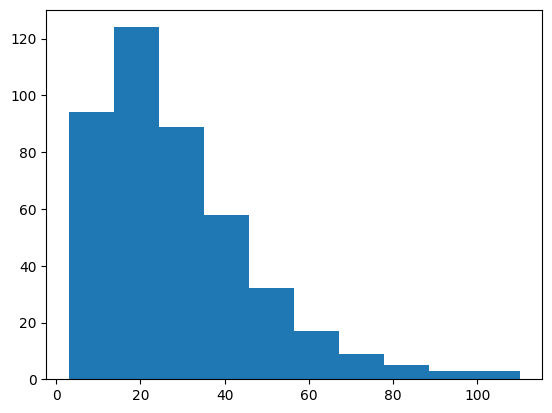

In [26]:
plt.hist(mouse_perf['training_time'])

In [ ]:
sns.lineplot(x='')